# Coleta de Dados no Twitter utilizando pacote Tweepy do Python

**OBSERVAÇÃO:**

Antes de usar o tweepy pela primeira vez, **<font color='red'>é necessário instalar o pacote</font>**. Para isso, acesse o prompt do Anaconda e execute o comando abaixo:

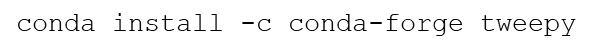

### Importação do pacote tweepy 

**<font color='red'>SEMPRE é necessário importar</font>**  o(s) pacote(s) que serão usados no seu script.

Vamos importar os pacotes que precisaremos usar nessa aplicação: TextBlob, Tweepy e NumPy
Tenha certeza que todos os pacotes foram previamente instalados. 

In [1]:
#Importação de pacotes

import tweepy


### Credenciais para utilização da API do Twitter

Para utilizar a API do twitter, é necessário ter uma conta no twitter, solicitar o acesso de desenvolvedor, criar sua aplicação, gerar suas credenciais.
* Veja vídeo explicativo "*APIs e coleta de dados*": https://igti.instructure.com/courses/2939/pages/apis-e-coleta-de-dados-2?module_item_id=194528

In [2]:
# Credenciais para utilização da API do Twitter

consumer_key = "ThjEtKexjpxXSEFdIskFAJIa1"
consumer_secret = "xVAOsFNAov5zBeToU6pQlTVGOGFY3yhaSdChzmAIq1LLFvNAs2"
access_token = "989683030229995521-lKpEaaN5RMMpJg99BIN0x4KFdEvJjde"
access_token_secret = "M9ibsxsupWqJ7Aby2FXtsPidLvrvmUIwTtNxDhXDDlO6Q"

Fazer a autenticação na API usando suas credenciais

In [3]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
token = tweepy.API(auth)

### Realizar a busca por palavra chave.

In [4]:
#Definir que palavra deseja pesquisar no Twitter
#keyword = 'covid-19'
keyword = ('covid OR covid-19 OR corona OR coronavirus')

In [5]:
# Fazer a busca por palavra chave

# result_type --> mixed (default), recent, popular
#tweets --> variável que irá armazenar todos os Tweets com a palavra escolhida na função search da API

tweets = token.search(q=keyword,count=10,result_type='mixed')

#tweets = token.search(q=keyword,count=10,result_type='mixed',tweet_mode='extended',Lang='en')


**Observação:**

Fazer a busca por palavra chave, busca o text do tweet truncado:
* tweets = token.search(q=keyword,lang='pt')

Fazer a busca por palavra chave, busca o text do tweet por inteiro
* tweets = token.search(q=keyword,tweet_mode='extended')

In [6]:
# Para verificar a quantidade de tweets coletado use a função "len()"

print("Total de tweets coletados %s." % (len(tweets)))

Total de tweets coletados 10.


In [7]:
#Podemos imprimir o nome do usuário (screen_name) e o texto do tweet

for tweet in tweets:
    print("Usuário: %s "% {tweet.user.screen_name})
    print("  Tweet: %s"  % {tweet.text})
    #print("  Tweet: %s"  % {tweet.full_text}) #No caso da busca em tweet_mode='extended'


Usuário: {'JasmynBeKnowing'} 
  Tweet: {'This woman on the news just said, imagine if there was a medication that reduced your chances of getting COVID by 5… https://t.co/A4WfncIX9G'}
Usuário: {'CNBCnow'} 
  Tweet: {'The Trump admin. plans to end federal funding and support for coronavirus testing sites at the end of this month,… https://t.co/SlXjay1M3f'}
Usuário: {'funder'} 
  Tweet: {'BREAKING: Trump is ending funding for 13 coronavirus testing sites in 5 states. This is an example of Trump slowing… https://t.co/M5Rws4dSUy'}
Usuário: {'AbelOli29927996'} 
  Tweet: {'RT @ConElMazoDando: La OMS dice que la vacuna contra el Covid-19 puede estar lista dentro de un año https://t.co/7u0fadlHUY  #Independencia…'}
Usuário: {'ahmetadanur061'} 
  Tweet: {'RT @de_aba_: Corona günleri 4.ay\nDiyett 1.gün..😊\nYaşasınnn hiç kilo almamışımm...😂 https://t.co/5Y80MxOQFM'}
Usuário: {'PrimeroMxico1'} 
  Tweet: {'RT @horuzacuario: @clubultra Aumentan los impuestos y que creen???? le da Covid-19 a Arturo H

## <font color=blue>Análise de polaridade</font>

Para fazer a **análise de polaridade**, vamos usar a função *sentiment.polarity* do pacote *TextBlob*.

* A função *sentiment.polarity* retornará um número entre -1 e 1, onde quanto maior esse número, menos "chateada" a pessoa que postou está. 

Ou seja, quanto maior esse número mais positivo é o tweet. Podemos ainda considerar que a polaridade 0 (zero) pode indicar uma neutralidade do tweet.

In [8]:
#importa pacotes

from textblob import TextBlob as tb
import numpy as np

**Observação:** Lembre-se de instalar os pacotes primeiro.

In [9]:
#Variável que irá armazenar as polaridades
analysis = None

In [10]:
# Lista vazia para armazenar scores
tweets_score = [] 

In [11]:
for tweet in tweets:
    print('**',tweet.text)
    analysis = tb(tweet.text)
    polarity = analysis.sentiment.polarity
    tweets_score.append(polarity)


** This woman on the news just said, imagine if there was a medication that reduced your chances of getting COVID by 5… https://t.co/A4WfncIX9G
** The Trump admin. plans to end federal funding and support for coronavirus testing sites at the end of this month,… https://t.co/SlXjay1M3f
** BREAKING: Trump is ending funding for 13 coronavirus testing sites in 5 states. This is an example of Trump slowing… https://t.co/M5Rws4dSUy
** RT @ConElMazoDando: La OMS dice que la vacuna contra el Covid-19 puede estar lista dentro de un año https://t.co/7u0fadlHUY  #Independencia…
** RT @de_aba_: Corona günleri 4.ay
Diyett 1.gün..😊
Yaşasınnn hiç kilo almamışımm...😂 https://t.co/5Y80MxOQFM
** RT @horuzacuario: @clubultra Aumentan los impuestos y que creen???? le da Covid-19 a Arturo Herrera pinche virus tan inoportuno como siempr…
** RT @charliekirk11: Joe Biden claimed 150 MILLION Americans have been killed by guns 

Now, he just claimed that 120 MILLION have been kille…
** Una persona de esa edad q

In [12]:
print('Vetor de polaridade:',tweets_score)

Vetor de polaridade: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.2, 0.0, -0.2, 0.03333333333333334]


In [13]:
print('MÉDIA DE SENTIMENTO: ' + str(np.mean(tweets_score))) #a função mean() pertence ao pacote numpy

MÉDIA DE SENTIMENTO: -0.03666666666666667


##### Análise de polaridade para tweets que não foram postados em inglês.

In [16]:
polarities = []

for tweet in tweets: #para cada tweet 
    analysis = tb(tweet.text)  # tweet.full_text para modo extendido
    
    if analysis.detect_language() != 'en': #verifica se o tweet esta em inglês, se não estiver, vai traduzir

        traducao = tb(str(analysis.translate(to='en')))
        
        print('Texto traduzido %s: ' % traducao)
        
        polarity = traducao.sentiment.polarity
    else:
        polarity = analysis.sentiment.polarity
    
    polarities.append(polarity)
    

Texto traduzido RT @ConElMazoDando: The WHO says that the vaccine against Covid-19 may be ready in a year https://t.co/7u0fadlHUY # Independence ...: 
Texto traduzido RT @de_aba_: Corona days 4th month
Diet 1 day..😊
Hooray I never gained weight ... 😂 https://t.co/5Y80MxOQFM: 
Texto traduzido RT @horuzacuario: @clubultra Tax increases and what do they believe ???? Covid-19 gives Arturo Herrera a virus as inopportune as always ...: 
Texto traduzido A person of that age who suffered a couple of weeks ago COVID-19 evidently died because of it 🤷‍♀️

It is incom… https://t.co/gDe1xhjMjJ: 


In [18]:
print('Vetor de polaridade:',polarities)

Vetor de polaridade: [0.0, 0.0, 0.0, 0.2, 0.0, 0.0, -0.2, 0.25, -0.2, 0.03333333333333334]


In [19]:
print('MÉDIA DE SENTIMENTO: ' + str(np.mean(polarities)))

MÉDIA DE SENTIMENTO: 0.008333333333333333


## <font color=blue>Armazenar o tweets coletados</font> 

Até aqui, nós criamos nossa autenticação e já temos acesso aos tweets coletados.
Agora vamos armazenar nossos tweets.

##### Armazenar em arquivos

In [20]:
#importa o pacote json

import json 

In [21]:
status = tweets[0]

#converte para string
json_str = json.dumps(status._json)

#deserialise string para um objeto python
parsed = json.loads(json_str)

In [22]:
type(tweets)

tweepy.models.SearchResults

In [23]:
type(json_str)

str

In [24]:
type(parsed)

dict

Agora vamos deserializar os tweets e gravar no arquivo json.

**Observação:** Antes de executar o scrit, verifique se o caminho de gravação do arquivo definido na variável *datasetPath* existe.

In [26]:
datasetPath = 'C:/Users/JoaoLott/Desktop/Git/ColetaDeDados_BootcampIGTI/DataSets/JSON'

with open(datasetPath+'\\tweets_keywords.json', 'a', encoding='utf8') as filename:    #aberto em mode de append
    
    for tweet in tweets: #para cada tweet no vetor de resultados tweets
        
        status = tweet
        
        #converte para string        
        json_str = json.dumps(status._json)
        
        #deserializa a string para um objeto python do tipo dict        
        parsed = json.loads(json_str)
        
        #grava o tweet deserializado no arquivo
        json.dump(parsed, filename, ensure_ascii=False, sort_keys=True, indent=4, separators=(',', ':'))

##### Armazenar no MongoDB

In [2]:
#importa o pacote pymongo

import pymongo

In [3]:
#Conexão ao banco de dados
con = pymongo.MongoClient('localhost', 27017)

#seleciona o banco de dados
db = con.twitterdb

In [4]:
#seleciona a coleção para armazenar os tweets
collection = db.tweets_keywords

In [5]:
#lista a quantidade de tweets existentes na coleção
db.collection.count()

C:\ProgramData\Anaconda3\envs\Dev\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: count is deprecated. Use estimated_document_count or count_documents instead. Please note that $where must be replaced by $expr, $near must be replaced by $geoWithin with $center, and $nearSphere must be replaced by $geoWithin with $centerSphere
  


0

In [6]:
#lista a quantidade de tweets existentes na coleção
db.collection.count_documents({})

0

In [32]:
i = 0
#para cada tweet no vetor de resultados tweets
for tweet in tweets:
    db.tweets_keywords.insert_one(tweet._json)
    i=i+1
    #print("Tweet inserido com sucesso !!")

In [33]:
#lista a quantidade de tweets inseridos
print("Quantidade de tweets inseridos: %s" % i)

Quantidade de tweets inseridos: 10


In [34]:
#lista a quantidade de tweets existentes na coleção
db.tweets_keywords.count_documents({})

10